# Y3 Gold astrometry plots

### Astrometry residual map and histogram

This notebook is intended to be used to create Y3 Gold paper plots: astrometry
(by Adriano Pieres)

In [ ]:
%matplotlib inline
import os,sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import fitsio
#from astropy.io import fits
#from astropy.io.fits.hdu.hdulist import HDUList
import healpy as hp
from descolors import BAND_COLORS
import warnings
warnings.filterwarnings('ignore')
workdir = '/Users/nsevilla/y3gold-paper/'
datadir = '/Volumes/NO NAME/'
figsdir = '/Users/nsevilla/y3gold-paper/figs/'

In [ ]:
#load Alex's skymap utilities
import skymap
from skymap import Skymap,McBrydeSkymap,OrthoSkymap
from skymap import SurveySkymap,SurveyMcBryde,SurveyOrtho
from skymap import DESSkymap

SKYMAPS = [Skymap,McBrydeSkymap,OrthoSkymap]
SURVEYS = [SurveySkymap,SurveyMcBryde,SurveyOrtho]

NSIDE = 256

In [ ]:
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 3

In [ ]:
# we will use the residual maps from Alex and William
# https://cdcvs.fnal.gov/redmine/projects/des-y3/wiki/Y3A2_Comparison_to_Gaia_DR2

In [ ]:
Y3DR2_astro_residual_map = fitsio.read(datadir+'median_angsep_old.fits',ext=1)['I'].ravel()

In [ ]:
fig = plt.figure(figsize=(12.,4.))
#fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(1, 2, width_ratios=[2, 1])
ax1 = plt.subplot(gs[0])
smap = DESSkymap()
smap.draw_hpxmap(Y3DR2_astro_residual_map,xsize=1000)
smap.draw_inset_colorbar(fontsize=14,ticks=[0,0.2])
smap.draw_des()
plt.title('Median angular separation vs Gaia DR2 stars in arcsecs', fontsize = 16, y=1.08)
ax2 = plt.subplot(gs[1])
fig.add_subplot(ax2)
plt.sca(ax2)
plt.xlabel('Astrometric residual in arcsecs',size=16)
plt.ylabel('PDF',labelpad=1,size=16)
n,b,p = plt.hist(Y3DR2_astro_residual_map[Y3DR2_astro_residual_map>0],normed=True,histtype='step',bins=100,linewidth=2)
p0 = [Y3DR2_astro_residual_map[Y3DR2_astro_residual_map>0].size, np.median(Y3DR2_astro_residual_map[Y3DR2_astro_residual_map>0]), np.std(Y3DR2_astro_residual_map[Y3DR2_astro_residual_map>0])]
text1 = 'median = %.3f \'\'' % p0[1] 
ax2.annotate(text1,(0.38,0.95),xycoords='axes fraction',ha='left',va='top',size=12)
plt.savefig(figsdir+'y3gold_astrometry_residuals.png')

In [1]:
%matplotlib inline
import healpy as hp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import matplotlib.image as mpimg
from matplotlib import rc
from matplotlib.colors import LogNorm
import matplotlib.gridspec as gridspec
plt.rc('font',**{'family':'serif','serif':['Helvetica'], 'size': 12})
mpl.rcParams['legend.numpoints'] = 1
plt.rc('text', usetex=True)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 3
cmap = mpl.cm.get_cmap("inferno")
cmap.set_under('darkgray')
cmap.set_bad('darkgray')

# we will use the residual maps from Alex and William
# https://cdcvs.fnal.gov/redmine/projects/des-y3/wiki/Y3A2_Comparison_to_Gaia_DR2

A function to plot data in mollweide view and extract to improve the view.

In [189]:
def plot_moll_cut(m, label, filename):
    
    ra_DES, dec_DES = np.loadtxt('data/des_round.dat', usecols=(0, 1), unpack=True)

    hp.visufunc.mollview(map=m, flip='geo', format='%.3g', cmap='inferno', coord='C', hold=True, xsize=800,
                         nest=False, cbar=False, notext=True, margins=None)
    hp.projplot(ra_DES, dec_DES, lonlat=True, coord=['C'], zorder=10, color='b', lw=0.5)

    hp.graticule(dpar=15.,dmer=30., lw=0.1)
    plt.savefig('figs/primary.png', dpi=600, bbox_inches='tight', pad_inches=0)
    plt.close()
    plt.clf()
    
    d_op = mpimg.imread('figs/primary.png')
    w, h = len(d_op[0,:]), len(d_op[:,0])
    # d_op = d_op[int(0.08156*h):int(0.9095*h),int(0.082*w):int(0.982*w)]
    d_op = d_op[int(0.125*h):int(0.88*h),int(0.1*w):int(0.99*w)]
    w, h = len(d_op[0,:]), len(d_op[:,0])

    fig = plt.figure(figsize = [15., 7])
    
    gridspec.GridSpec(12,30)
    plt.subplot2grid((12,30), (0,0), colspan=20, rowspan=12)
    #ax1 = fig.add_subplot(111)
    #plt.set_facecolor('lightgray')
    plt.imshow(d_op[int(0.4293*h):int(0.9497*h), int(0.3611*w):int(0.75*w)], extent=[-45., 90.,-75.,10.],
               aspect='auto', origin='upper', interpolation=None, vmin=0., vmax=0.2, cmap=cmap)
    plt.title(r'$\mathrm{%s}$' % label, fontsize=20)
    plt.xlabel(r'$\mathrm{\alpha}$')
    plt.ylabel(r'$\mathrm{\delta}$')
    plt.ylim([-75,10])
    plt.xlim([90,-45])

    y_ = [-0., -15, -34, -50, -64, -75]
    labels_y=[r'$\mathrm{0^o}$', r'$\mathrm{-15^o}$', r'$\mathrm{-30^o}$', r'$\mathrm{-45^o}$', r'$\mathrm{-60^o}$', r'$\mathrm{-75^o}$']
    x = [67, 54, 41.5, 29, 16, 3, -9, -22, -35]
    labels=[r'$\mathrm{150^o}$', r'$\mathrm{120^o}$', r'$\mathrm{90^o}$', r'$\mathrm{60^o}$', r'$\mathrm{30^o}$', r'$\mathrm{0^o}$', r'$\mathrm{-30^o}$', r'$\mathrm{-60^o}$', r'$\mathrm{-90^o}$']

    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
    plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=True)
    plt.xticks(x, labels, rotation='horizontal')
    plt.yticks(y_, labels_y)
    cbaxes = fig.add_axes([0.427, 0.63, 0.2, 0.035])
    cb = plt.colorbar(cax=cbaxes, cmap=cmap, orientation='horizontal', ticks=[0.0,0.05,0.10,0.15,0.20]) #, label=r'$\mathrm{%s}$' % labelcb)
    cb.ax.tick_params(labelsize=12)

    plt.subplot2grid((12,30), (0,23), colspan=7, rowspan=12)
    plt.hist(m, bins=np.arange(0,0.5,0.01), color='r', alpha = 0.5, lw=1, histtype='step', log=False)
    n, bins, patches = plt.hist(m, bins=np.arange(0.,0.5,0.01), color='r', alpha = 0.5, lw=1, log=False)
    plt.title(r'$\mathrm{Astrometric\ residual}$', fontsize=16)
    plt.xlabel(r'$\mathrm{arcsec}$')
    plt.xlim([0,0.5])
    #plt.ylim([1e2,1.2*np.max(n)])
    plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.25)
    plt.ylabel(r'$\mathrm{N}$')
    text1 = str("""Median: \n{0:4.3f} arcsec""".format(np.median(m[np.abs(m) <= 1])))
    plt.annotate(text1,(0.5,0.95),xycoords='axes fraction',ha='left',va='top',size=12)
    #plt.savefig('figs/HP_EQU_' + filename + '.png', dpi=300, bbox_inches='tight')
    #plt.close()
    #plt.clf()

In [190]:
HPX = fits.open("data/median_angsep_old.fits.gz", memmap=True)[1].data.field('I').ravel()

0.0 180.0 -180.0 180.0
The interval between parallels is 15 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


<Figure size 432x288 with 0 Axes>

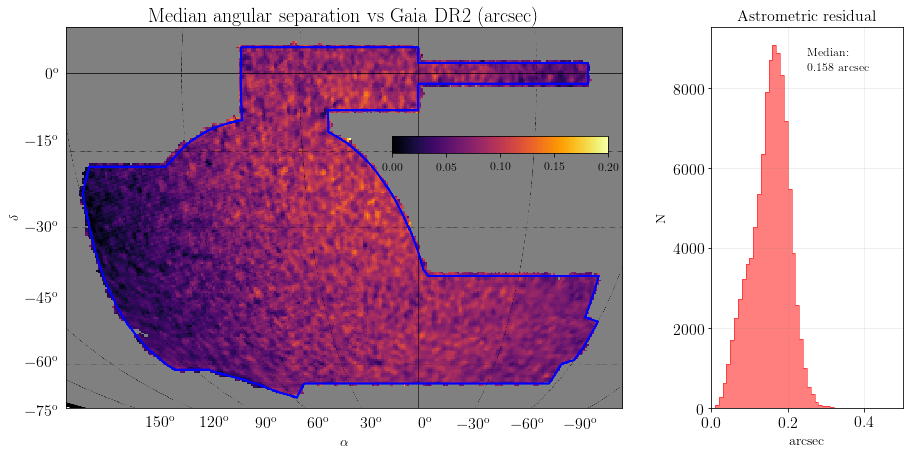

In [191]:
plot_moll_cut(HPX, 'Median\ angular\ separation\ vs\ Gaia\ DR2\ (arcsec)', 'angsep')